<h5>Import dataset</h5>
<h6>Load the dataset from a file .csv<br>
Font: https://www.footballwebpages.co.uk/premier-league/league-table<h6>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.min_rows', 200)
pd.set_option("display.max_rows", 600)
pd.set_option("display.max_columns", 100)

# Premier League - England
#premier_league_2016_2017 = pd.read_csv("https://www.football-data.co.uk/mmz4281/1617/E0.csv")
#premier_league_2017_2018 = pd.read_csv("https://www.football-data.co.uk/mmz4281/1718/E0.csv")
#premier_league_2018_2019 = pd.read_csv("https://www.football-data.co.uk/mmz4281/1819/E0.csv")
#premier_league_2019_2020 = pd.read_csv("https://www.football-data.co.uk/mmz4281/1920/E0.csv")
#premier_league_2020_2021 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2021/E0.csv")
premier_league_2021_2022 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2122/E0.csv")
premier_league_2022_2023 = pd.read_csv("https://www.football-data.co.uk/mmz4281/2223/E0.csv")

#df = pd.concat([premier_league_2016_2017, premier_league_2017_2018, premier_league_2018_2019, premier_league_2019_2020, premier_league_2020_2021, premier_league_2021_2022, premier_league_2022_2023], axis=0, ignore_index=True)
df = pd.concat([premier_league_2021_2022, premier_league_2022_2023], axis=0, ignore_index=True)
df["League"] = "Premier League"
df = df[["League", "Date", "HomeTeam", "AwayTeam", "HTHG", "HTAG", "HTR", "FTHG", "FTAG", "FTR", "B365H", "B365D", "B365A"]]
df.columns = ["league", "date", "home", "away", "home_goals_ht", "away_goals_ht", "result_ht", "home_goals_ft", "away_goals_ft", "result_ft", "home_odds", "draw_odds", "away_odds"]
df = df.astype({"date":"datetime64"})
df = df.convert_dtypes(infer_objects=True)
df.reset_index(inplace=True, drop=True)
df.tail()

,league,date,home,away,home_goals_ht,away_goals_ht,result_ht,home_goals_ft,away_goals_ft,result_ft,home_odds,draw_odds,away_odds
606,Premier League,2023-02-18,Nott'm Forest,Man City,0,1,A,1,1,D,8.50,5.50,1.30
607,Premier League,2023-02-18,Wolves,Bournemouth,0,0,D,0,1,A,1.67,3.60,6.00
608,Premier League,2023-02-18,Newcastle,Liverpool,0,2,A,0,2,A,2.50,3.50,2.70
609,Premier League,2023-02-19,Man United,Leicester,1,0,H,3,0,H,1.62,4.33,5.25
610,Premier League,2023-02-19,Tottenham,West Ham,0,0,D,2,0,H,1.75,3.60,4.75


<h5>Back Linear (bet in favor of) - Losses and Wins</h5>

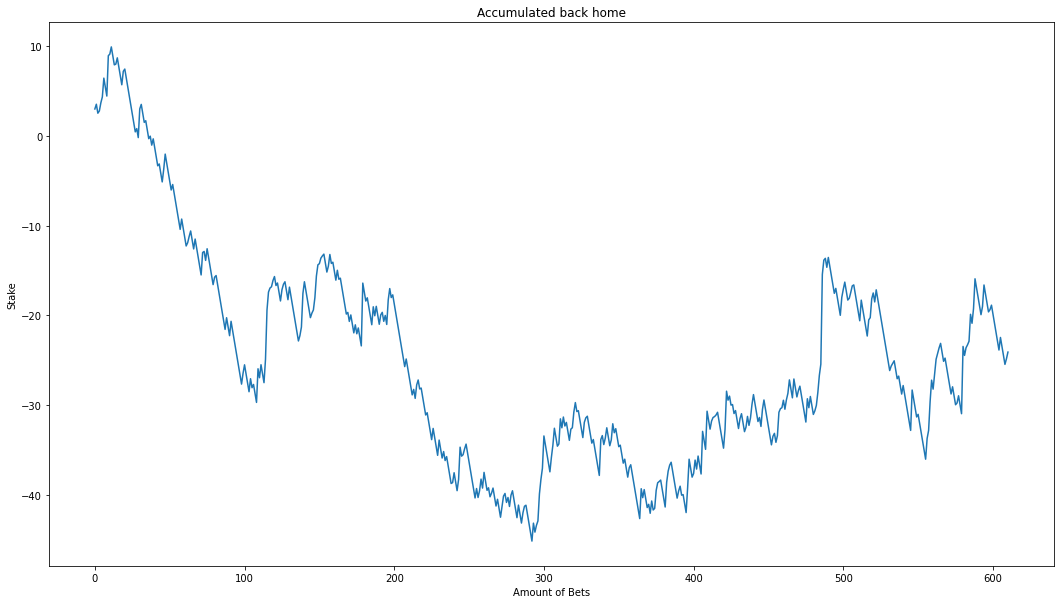

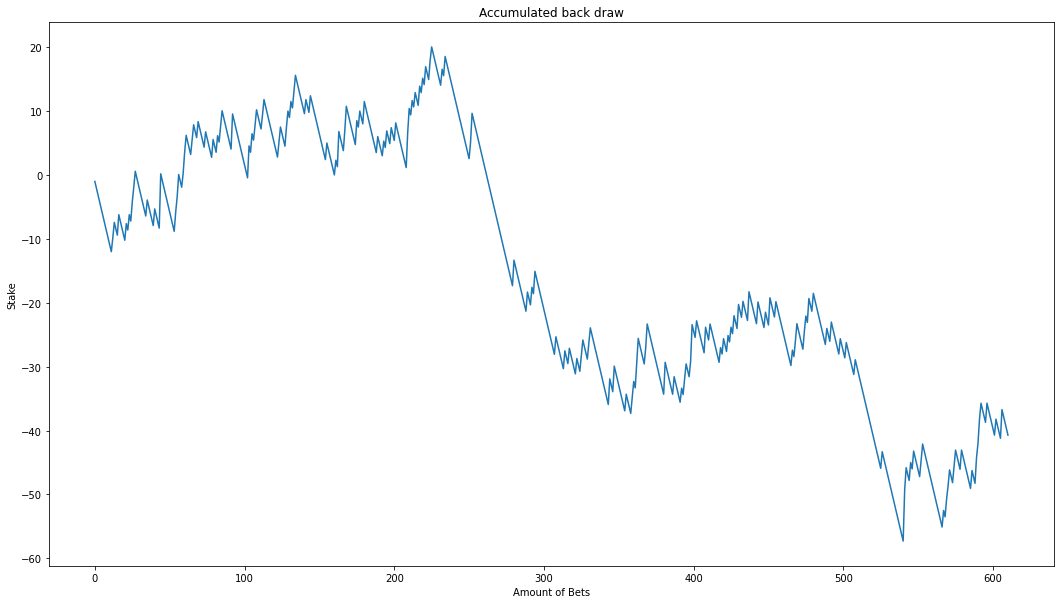

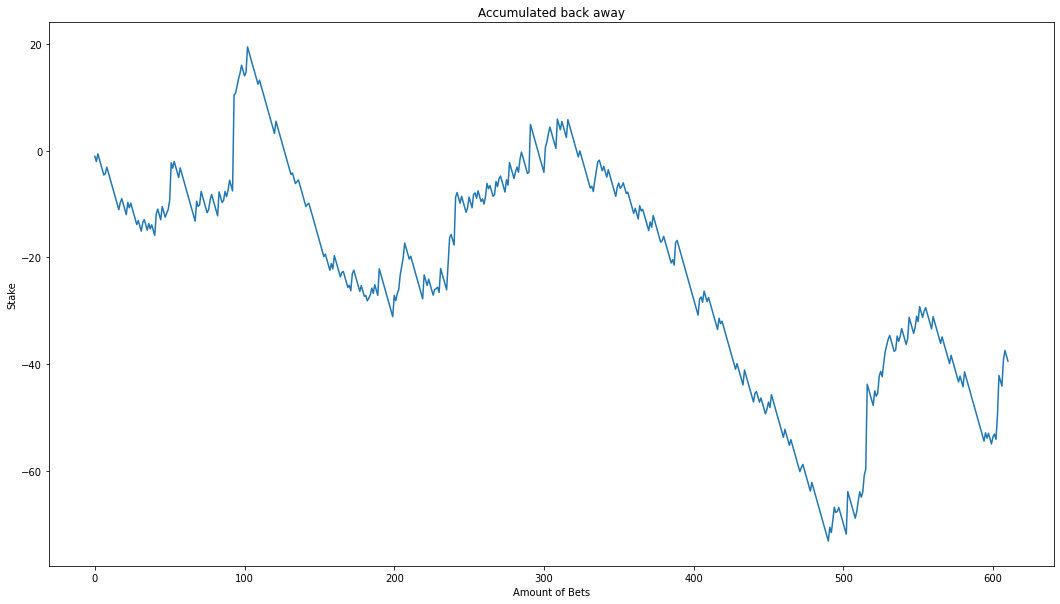

,result_ft,back_home,back_draw,back_away,back_home_accumulated,back_draw_accumulated,back_away_accumulated
606,D,-1.00,4.5,-1.0,-23.47,-36.72,-44.16
607,A,-1.00,-1.0,5.0,-24.47,-37.72,-39.16
608,A,-1.00,-1.0,1.7,-25.47,-38.72,-37.46
609,H,0.62,-1.0,-1.0,-24.85,-39.72,-38.46
610,H,0.75,-1.0,-1.0,-24.10,-40.72,-39.46


In [5]:
win_back_home = (1 * df["home_odds"]) - 1
win_back_draw = (1 * df["draw_odds"]) - 1
win_back_away = (1 * df["away_odds"]) - 1
lose = -1

# Back linear
df["back_home"] = win_back_home.where(df["result_ft"] == "H", other=lose)
df["back_draw"] = win_back_draw.where(df["result_ft"] == "D", other=lose)
df["back_away"] = win_back_away.where(df["result_ft"] == "A", other=lose)

# Accumulated back home
df["back_home_accumulated"] = df["back_home"].cumsum().round(2)
plt.figure(figsize=(18,10))
df["back_home_accumulated"].plot(title="Accumulated back home", xlabel="Amount of Bets", ylabel="Stake")
plt.show()

# Accumulated back draw
df["back_draw_accumulated"] = df["back_draw"].cumsum().round(2)
plt.figure(figsize=(18,10))
df["back_draw_accumulated"].plot(title="Accumulated back draw", xlabel="Amount of Bets", ylabel="Stake")
plt.show()

# Accumulated back away
df["back_away_accumulated"] = df["back_away"].cumsum().round(2)
plt.figure(figsize=(18,10))
df["back_away_accumulated"].plot(title="Accumulated back away", xlabel="Amount of Bets", ylabel="Stake")
plt.show()
df[["result_ft", "back_home", "back_draw", "back_away", 
    "back_home_accumulated", "back_draw_accumulated", "back_away_accumulated"]].tail()

<h5>Lay Linear (bet against) - Losses and Wins</h5>

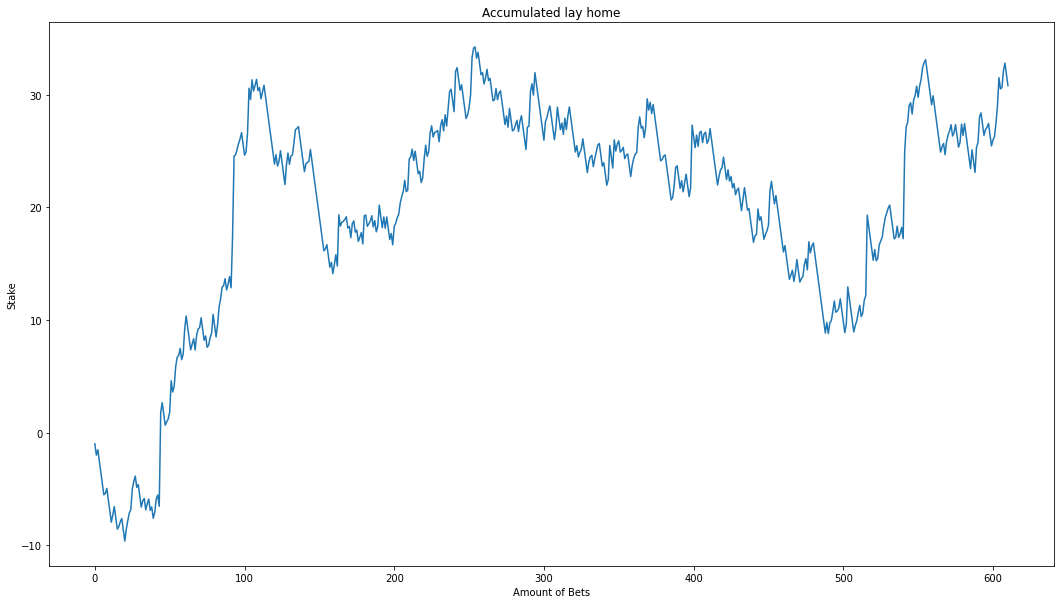

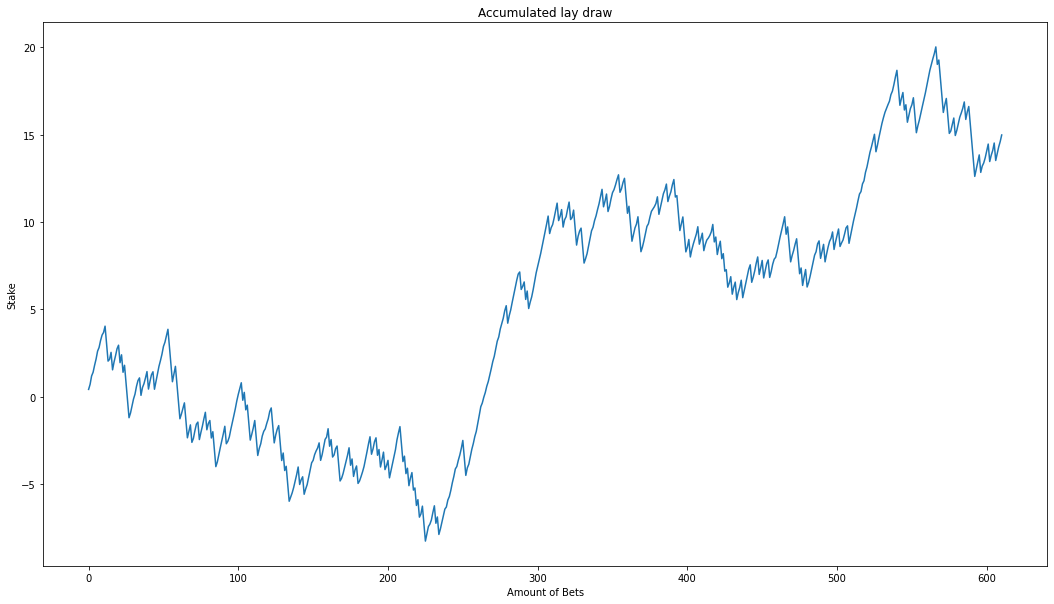

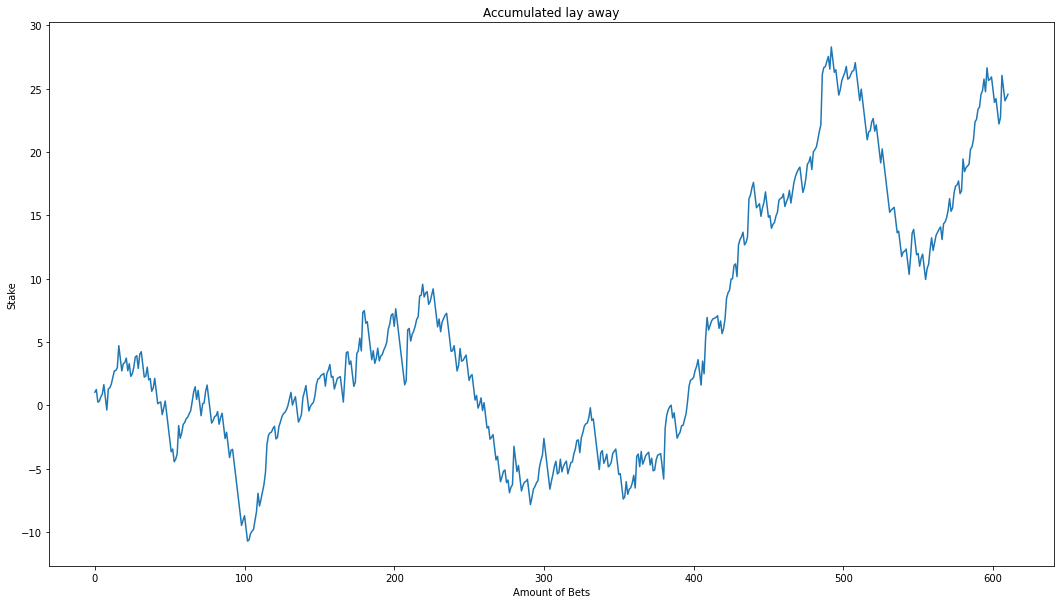

,result_ft,lay_home,lay_draw,lay_away,lay_home_accumulated,lay_draw_accumulated,lay_away_accumulated
606,D,0.13,-1.00,3.33,30.65,13.52,26.04
607,A,1.49,0.38,-1.00,32.14,13.90,25.04
608,A,0.67,0.40,-1.00,32.81,14.30,24.04
609,H,-1.00,0.30,0.24,31.81,14.60,24.28
610,H,-1.00,0.38,0.27,30.81,14.98,24.55


In [6]:
win_lay_home = 1 / (df["home_odds"] - 1)
win_lay_draw = 1 / (df["draw_odds"] - 1)
win_lay_away = 1 / (df["away_odds"] - 1)
lose = -1

# Lay linear
df["lay_home"] = win_lay_home.where(df["result_ft"] != "H", other=lose).round(2)
df["lay_draw"] = win_lay_draw.where(df["result_ft"] != "D", other=lose).round(2)
df["lay_away"] = win_lay_away.where(df["result_ft"] != "A", other=lose).round(2)
df.tail()

# Accumulated lay home
df["lay_home_accumulated"] = df["lay_home"].cumsum().round(2)
plt.figure(figsize=(18, 10))
df["lay_home_accumulated"].plot(title="Accumulated lay home", xlabel="Amount of Bets", ylabel="Stake")
plt.show()

# Accumulated lay draw
df["lay_draw_accumulated"] = df["lay_draw"].cumsum().round(2)
plt.figure(figsize=(18, 10))
df["lay_draw_accumulated"].plot(title="Accumulated lay draw", xlabel="Amount of Bets", ylabel="Stake")
plt.show()

# Accumulated back away
df["lay_away_accumulated"] = df["lay_away"].cumsum().round(2)
plt.figure(figsize=(18, 10))
df["lay_away_accumulated"].plot(title="Accumulated lay away", xlabel="Amount of Bets", ylabel="Stake")
plt.show()

df[["result_ft", "lay_home", "lay_draw", "lay_away", "lay_home_accumulated", 
    "lay_draw_accumulated", "lay_away_accumulated"]].tail()

<h5>Points Home / Away</h5>
<h6>Calculate how many points the team did at match</h6>

In [7]:
def points_home(result):
    if result == "H":
        points = 3
    elif result == "D":
        points = 1
    else:
        points = 0
    return points

def points_away(result):
    if result == "A":
        points = 3
    elif result == "D":
        points = 1
    else:
        points = 0
    return points

df["points_home"] = df.apply(lambda row: points_home(row["result_ft"]), axis=1)
df["points_away"] = df.apply(lambda row: points_away(row["result_ft"]), axis=1)
df.tail()

,league,date,home,away,home_goals_ht,away_goals_ht,result_ht,home_goals_ft,away_goals_ft,result_ft,home_odds,draw_odds,away_odds,back_home,back_draw,back_away,back_home_accumulated,back_draw_accumulated,back_away_accumulated,lay_home,lay_draw,lay_away,lay_home_accumulated,lay_draw_accumulated,lay_away_accumulated,points_home,points_away
606,Premier League,2023-02-18,Nott'm Forest,Man City,0,1,A,1,1,D,8.50,5.50,1.30,-1.00,4.5,-1.0,-23.47,-36.72,-44.16,0.13,-1.00,3.33,30.65,13.52,26.04,1,1
607,Premier League,2023-02-18,Wolves,Bournemouth,0,0,D,0,1,A,1.67,3.60,6.00,-1.00,-1.0,5.0,-24.47,-37.72,-39.16,1.49,0.38,-1.00,32.14,13.90,25.04,0,3
608,Premier League,2023-02-18,Newcastle,Liverpool,0,2,A,0,2,A,2.50,3.50,2.70,-1.00,-1.0,1.7,-25.47,-38.72,-37.46,0.67,0.40,-1.00,32.81,14.30,24.04,0,3
609,Premier League,2023-02-19,Man United,Leicester,1,0,H,3,0,H,1.62,4.33,5.25,0.62,-1.0,-1.0,-24.85,-39.72,-38.46,-1.00,0.30,0.24,31.81,14.60,24.28,3,0
610,Premier League,2023-02-19,Tottenham,West Ham,0,0,D,2,0,H,1.75,3.60,4.75,0.75,-1.0,-1.0,-24.10,-40.72,-39.46,-1.00,0.38,0.27,30.81,14.98,24.55,3,0


<h5>Informations about Goals</h5>
<h6>Total goals Half-time, Total goals Full-time, Over 0.5 goals, Over 1.5 goals, Over 2.5 goals, Both teams score<br> Mean Over 0.5 goals, Mean Over 1.5 goals, Mean Over 2.5 goals, Mean Both teams score <br>Standard Deviation Over 0.5 goals, Standard Deviation Over 1.5 goals, Standard Deviation Over 2.5 goals, Standard Deviation Both teams score<br> 
Coefficient of variation Over 0.5 goals, Coefficient of variation Over 1.5 goals, Coefficient of variation Over 2.5 goals, Coefficient of variation Both teams score</h6>

In [8]:
df["total_goals_ht"] = df.apply(lambda row: (row["home_goals_ht"] + row["away_goals_ht"]), axis=1)
df["total_goals_ft"] = df.apply(lambda row: (row["home_goals_ft"] + row["away_goals_ft"]), axis=1)
df["over05_ht"] = df.apply(lambda row: 1 if (row["total_goals_ht"] > 0 ) else 0, axis=1)
df["over05_ft"] = df.apply(lambda row: 1 if (row["total_goals_ft"] > 0 ) else 0, axis=1)
df["over15_ft"] = df.apply(lambda row: 1 if (row["total_goals_ft"] > 1 ) else 0, axis=1)
df["over25_ft"] = df.apply(lambda row: 1 if (row["total_goals_ft"] > 2 ) else 0, axis=1)
df["both_teams_score"] = df.apply(lambda row: 1 if (row["home_goals_ft"] > 0 and row["away_goals_ft"] > 0) else 0, axis=1)

mean_over05_home = df[["home", "over05_ft"]].groupby("home").mean() * 100
mean_over15_home = df[["home", "over15_ft"]].groupby("home").mean() * 100
mean_over25_home = df[["home", "over25_ft"]].groupby("home").mean() * 100
mean_both_teams_score_home = df[["home", "both_teams_score"]].groupby("home").mean() * 100
mean_goals_home = df[["home", "home_goals_ft"]].groupby("home").mean()
standard_deviation_goals_home = df[["home", "home_goals_ft"]].groupby("home").std()
coefficiente_variation_goals_home = (standard_deviation_goals_home / mean_goals_home)

mean_over05_away = df[["away", "over05_ft"]].groupby("away").mean() * 100
mean_over15_away = df[["away", "over15_ft"]].groupby("away").mean() * 100
mean_over25_away = df[["away", "over25_ft"]].groupby("away").mean() * 100
mean_both_teams_score_away = df[["away", "both_teams_score"]].groupby("away").mean() * 100
mean_goals_away = df[["away", "away_goals_ft"]].groupby("away").mean()
standard_deviation_goals_away = df[["away", "away_goals_ft"]].groupby("away").std()
coefficiente_variation_goals_away = (standard_deviation_goals_away / mean_goals_away)

df_statistics_goal_home = pd.concat([mean_over05_home, mean_over15_home, mean_over25_home, mean_both_teams_score_home, mean_goals_home, standard_deviation_goals_home, coefficiente_variation_goals_home], axis=1)
df_statistics_goal_home.columns = ["mean_over05_home", "mean_over15_home", "mean_over25_home", "mean_both_teams_score_home", "mean_goals_home", "standard_deviation_goals_home", "coefficiente_variation_goals_home"]

df_statistics_goal_away = pd.concat([mean_over05_away, mean_over15_away, mean_over25_away, mean_both_teams_score_away, mean_goals_away, standard_deviation_goals_away, coefficiente_variation_goals_away], axis=1)
df_statistics_goal_away.columns = ["mean_over05_away", "mean_over15_away", "mean_over25_away", "mean_both_teams_score_away", "mean_goals_away", "standard_deviation_goals_away", "coefficiente_variation_goals_away"]

df_statistics_goal_away


,mean_over05_away,mean_over15_away,mean_over25_away,mean_both_teams_score_away,mean_goals_away,standard_deviation_goals_away,coefficiente_variation_goals_away
away,,,,,,,
Arsenal,96.774194,74.193548,51.612903,32.258065,1.612903,1.498386,0.928999
Aston Villa,93.333333,73.333333,56.666667,46.666667,1.066667,0.907187,0.850488
Bournemouth,100.000000,83.333333,50.000000,33.333333,0.833333,1.193416,1.432100
Brentford,90.000000,90.000000,63.333333,63.333333,1.300000,1.118805,0.860619
Brighton,96.666667,90.000000,50.000000,66.666667,1.500000,1.074789,0.716526
Burnley,89.473684,78.947368,36.842105,52.631579,0.842105,0.898342,1.066781
Chelsea,90.322581,70.967742,48.387097,41.935484,1.580645,1.408881,0.891333
Crystal Palace,90.000000,73.333333,46.666667,50.000000,1.066667,1.080655,1.013114
Everton,93.333333,86.666667,50.000000,53.333333,0.733333,0.739680,1.008654


<h5>Informations about Points</h5>

In [9]:
mean_points_home = df[["home", "points_home"]].groupby("home").mean()
standard_deviation_points_home = df[["home", "points_home"]].groupby("home").std()
coefficiente_variation_points_home = (standard_deviation_points_home / mean_points_home)

mean_points_away = df[["away", "points_away"]].groupby("away").mean()
standard_deviation_points_away = df[["away", "points_away"]].groupby("away").std()
coefficiente_variation_points_away = (standard_deviation_points_away / mean_points_away)

df_statistics_points_home = pd.concat([mean_points_home, standard_deviation_points_home, coefficiente_variation_points_home], axis=1)
df_statistics_points_home.columns = ["mean_points_home", "standard_deviation_points_home", "coefficiente_variation_points_home"]

df_statistics_points_away = pd.concat([mean_points_away, standard_deviation_points_away, coefficiente_variation_points_away], axis=1)
df_statistics_points_away.columns = ["mean_points_away", "standard_deviation_points_away", "coefficiente_variation_points_away"]


In [10]:
df_analyse = pd.concat([mean_over05_home, mean_over15_home, mean_over25_home, mean_both_teams_score_home, mean_goals_home, standard_deviation_goals_home, coefficiente_variation_goals_home, 
                        mean_over05_away, mean_over15_away, mean_over25_away, mean_both_teams_score_away, mean_goals_away, standard_deviation_goals_away, coefficiente_variation_goals_away, 
                        mean_points_home, standard_deviation_points_home, coefficiente_variation_points_home, 
                        mean_points_away, standard_deviation_points_away, coefficiente_variation_points_away], axis=1)
df_analyse.columns = ["mean_over05_home", "mean_over15_home", "mean_over25_home", "mean_both_teams_score_home", "mean_goals_home", "standard_deviation_goals_home", "coefficiente_variation_goals_home", 
                      "mean_over05_away", "mean_over15_away", "mean_over25_away", "mean_both_teams_score_away", "mean_goals_away", "standard_deviation_goals_away", "coefficiente_variation_goals_away", 
                      "mean_points_home", "standard_deviation_points_home", "coefficiente_variation_points_home", 
                      "mean_points_away", "standard_deviation_points_away", "coefficiente_variation_points_away"]

home = input("Type the name of principal(home): ")
away = input("Type the name of visitor(away): ")
filter_home = df_analyse[df_analyse.index == home]
filter_away = df_analyse[df_analyse.index == away]
display(filter_home, filter_away)

,mean_over05_home,mean_over15_home,mean_over25_home,mean_both_teams_score_home,mean_goals_home,standard_deviation_goals_home,coefficiente_variation_goals_home,mean_over05_away,mean_over15_away,mean_over25_away,mean_both_teams_score_away,mean_goals_away,standard_deviation_goals_away,coefficiente_variation_goals_away,mean_points_home,standard_deviation_points_home,coefficiente_variation_points_home,mean_points_away,standard_deviation_points_away,coefficiente_variation_points_away


,mean_over05_home,mean_over15_home,mean_over25_home,mean_both_teams_score_home,mean_goals_home,standard_deviation_goals_home,coefficiente_variation_goals_home,mean_over05_away,mean_over15_away,mean_over25_away,mean_both_teams_score_away,mean_goals_away,standard_deviation_goals_away,coefficiente_variation_goals_away,mean_points_home,standard_deviation_points_home,coefficiente_variation_points_home,mean_points_away,standard_deviation_points_away,coefficiente_variation_points_away
